# KNN Code and Metric Implementations

In [2]:
import pandas as pd
import math

def WeightedDist(o1, o2, dim, corr):
  #o1 is the testing instance, o2 is training
  ls = [(corr[i] * (o1.iloc[i]-o2.iloc[i]))**2 for i in range(dim)]
  return (sum(ls), o2.iloc[dim])

def EuclidDist(o1, o2, dim, corr):
  ls = [(o1.iloc[i]-o2.iloc[i])**2 for i in range(dim)]
  return (sum(ls), o2.iloc[dim])

def HammingDist(o1, o2, dim, corr):
  ls = [o1.iloc[i]==o2.iloc[i] for i in range(dim)]
  return (sum(ls), o2.iloc[dim])

def KNN(test, train, dim, k, metricFunction):
  pred = list()
  corr = list()
  #get correlation coefficients
  if metricFunction in [WeightedDist]:
    trainQ = train.copy()
    clas = trainQ[trainQ.columns[-1]]
    labels = list(set(clas))
    #quantify the class variable in preparation of corr coeff
    for i in range(len(labels)):
      clas = clas.replace(labels[i], i)
    trainQ[trainQ.columns[-1]] = clas
    corrMatrix = pd.DataFrame(trainQ).corr()
    corr = list(corrMatrix[corrMatrix.columns[-1]])

  #find distance to all instances on training set
  for i in range(len(test)):
    dists = list()
    for j in range(len(train)):
      dists.append(metricFunction(test.loc[i], train.loc[j], dim, corr))
    dists.sort()
    dists = dists[:k]
    ls = [x[1] for x in dists]
    pred.append(max(ls, key=ls.count))
  return pred

def KNNsmart(test, train, dim, k, metricFunction, cache=None):
  #cache is a list of distances between test instances and train instances
  pred = list()
  corr = list()
  #get correlation coefficients
  if metricFunction in [WeightedDist]:
    trainQ = train.copy()
    clas = trainQ[trainQ.columns[-1]]
    labels = list(set(clas))
    #quantify the class variable in preparation of corr coeff
    for i in range(len(labels)):
      clas = clas.replace(labels[i], i)
    trainQ[trainQ.columns[-1]] = clas
    corrMatrix = pd.DataFrame(trainQ).corr()
    corr = list(corrMatrix[corrMatrix.columns[-1]])

  #find distance to all instances on training set
  if cache:
    for i in range(len(test)):
      dists = cache[i]
      ls = [x[1] for x in dists[:k]]
      pred.append(max(ls, key=ls.count))
  else:
    cache = list()
    for i in range(len(test)):
      dists = list()
      for j in range(len(train)):
        dists.append(metricFunction(test.loc[i], train.loc[j], dim, corr))
      dists.sort()
      cache.append(dists)
      ls = [x[1] for x in dists[:k]]
      pred.append(max(ls, key=ls.count))
  return pred, cache



def getMultiMetrics(confusionmatrix):
  #assume actual values are horizontal in yes no order
  size = len(confusionmatrix)
  print(f"Accuracy: {sum([confusionmatrix[r][r] for r in range(size)])/sum([sum([confusionmatrix[r][c] for r in range(size)]) for c in range(size)])}")
  #precision
  total = 0
  for r in range(size):
    total += confusionmatrix[r][0]
  precision = confusionmatrix[0][0]/total
  print(f"Precision: {precision:.2f}")

  #recall
  total = 0
  for c in range(size):
    total += confusionmatrix[0][c]
  recall = confusionmatrix[0][0]/total
  print(f"Recall: {recall:.2f}")

  F1 = 2*precision*recall/(recall + precision)
  print(f"F1: {F1:.2f}")
  return F1

def getMatrix(actual, predicted):
  A = list(set(actual))
  getIdx = {}
  for i in range(len(A)):
    getIdx[A[i]] = i

  matrix = [[0]*len(A) for i in range(len(A))]

  for i in range(len(actual)):
    matrix[getIdx[actual[i]]][getIdx[predicted[i]]] += 1

  print(A)
  return matrix

# Running the experiments

3: Hamming

4: Correlation coefficient-weighted Euclidean distance


In [3]:
from time import time
import matplotlib.pyplot as plt

def heatmap(confusionMatrix):
  fig, ax = plt.subplots()

  im = ax.imshow(confusionMatrix)

  # Axis labels
  ax.xaxis.set_label_position('top')
  ax.xaxis.set_ticks_position('top')
  ax.set_xlabel("Predicted label")
  ax.set_ylabel("Actual label")
  ax.set_xticks([0, 1])
  ax.set_yticks([0, 1])
  ax.set_xticklabels(["Positive", "Negative"])
  ax.set_yticklabels(["Positive", "Negative"])

  # Annotate each cell
  for i in range(2):
      for j in range(2):
          ax.text(j, i, confusionMatrix[i][j],
                  ha="center", va="center")

  plt.colorbar(im)
  plt.tight_layout()
  plt.show()


def runExperiment(train, test, k, metricFunction):
  dim = len(train.columns)-1

  metrics = {"Normal Euclidean Distance": EuclidDist, "Weighted Euclidean Distance":WeightedDist, "Hamming Distance":HammingDist}

  print(metricFunction)
  print()
  time0 = time()
  y_pred = KNN(test, train, dim, k, metrics[metricFunction])
  time1 = time()
  y_test = test['class']

  # print("Actual:\n", y_test)
  # print("Predicted:\n", y_pred)

  confusionMatrix = getMatrix(y_test, y_pred)
  for row in confusionMatrix:
    print(row)
  print()
  heatmap(confusionMatrix)
  print()
  getMultiMetrics(confusionMatrix)
  print(f"Time taken: {round(time1-time0,4)} seconds")
  print()
  print()


Hamming Distance

['tested_positive', 'tested_negative']
[12, 47]
[27, 68]



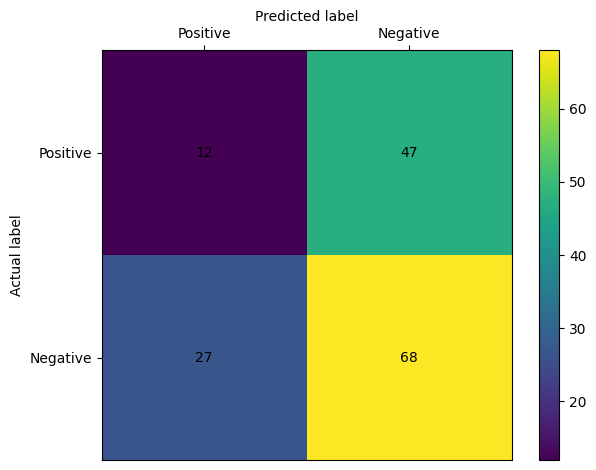


Accuracy: 0.5194805194805194
Precision1: 0.31
Precision2: 0.59
Recall1: 0.20
Recall2: 0.72
Time taken: 12.2407 seconds




In [23]:
#train = pd.read_csv('/content/drive/MyDrive/TJ/ML/Olivia Wu - Lab 9/iris_train.csv')
#test = pd.read_csv('/content/drive/MyDrive/TJ/ML/Olivia Wu - Lab 9/iris_test.csv')

k=8

train = pd.read_csv('/content/drive/MyDrive/TJ/ML/ML1 Q2 Project/Data/Diabetes_train_binned.csv')
test = pd.read_csv('/content/drive/MyDrive/TJ/ML/ML1 Q2 Project/Data/Diabetes_test_binned.csv')

runExperiment(train, test, k, "Hamming Distance")

k-fold cross validation for euclidean and correlation-weighted euclidean

In [1]:
import matplotlib.pyplot as plt

def runExperiment(train, test, maxK, metricFunction, caches):
  dim = len(train.columns)-1

  metrics = {"Normal Euclidean Distance": EuclidDist, "Weighted Euclidean Distance":WeightedDist}

  print(metricFunction)
  print()

  F1 = list()
  for k in range(1, maxK+1):
    y_pred, cache = KNNsmart(test, train, dim, k, metrics[metricFunction], caches[metricFunction])
    if not caches[metricFunction]: caches[metricFunction] = cache
    y_test = test['class']

    confusionMatrix = getMatrix(y_test, y_pred)
    for row in confusionMatrix:
      print(row)
    print()
    #heatmap(confusionMatrix)
    #print()
    F1.append(getMultiMetrics(confusionMatrix))
    print()
    print()
  return F1


Graphing F1 for each distance metric (normal and weighted Euclidean)

FOLD 1
Normal Euclidean Distance

['tested_positive', 'tested_negative']
[27, 31]
[20, 75]

Accuracy: 0.6666666666666666
Precision: 0.57
Recall: 0.47
F1: 0.51


['tested_positive', 'tested_negative']
[27, 31]
[20, 75]

Accuracy: 0.6666666666666666
Precision: 0.57
Recall: 0.47
F1: 0.51


['tested_positive', 'tested_negative']
[23, 35]
[19, 76]

Accuracy: 0.6470588235294118
Precision: 0.55
Recall: 0.40
F1: 0.46


['tested_positive', 'tested_negative']
[26, 32]
[18, 77]

Accuracy: 0.673202614379085
Precision: 0.59
Recall: 0.45
F1: 0.51


['tested_positive', 'tested_negative']
[23, 35]
[20, 75]

Accuracy: 0.6405228758169934
Precision: 0.53
Recall: 0.40
F1: 0.46


['tested_positive', 'tested_negative']
[25, 33]
[16, 79]

Accuracy: 0.6797385620915033
Precision: 0.61
Recall: 0.43
F1: 0.51


['tested_positive', 'tested_negative']
[24, 34]
[19, 76]

Accuracy: 0.6535947712418301
Precision: 0.56
Recall: 0.41
F1: 0.48


['tested_positive', 'tested_negative']
[23, 35]
[18, 77]

Accuracy: 0.65359477

/tmp/ipython-input-1966411800.py:54: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clas = clas.replace(labels[i], i)


['tested_positive', 'tested_negative']
[26, 32]
[27, 68]

Accuracy: 0.6143790849673203
Precision: 0.49
Recall: 0.45
F1: 0.47


['tested_positive', 'tested_negative']
[26, 32]
[27, 68]

Accuracy: 0.6143790849673203
Precision: 0.49
Recall: 0.45
F1: 0.47


['tested_positive', 'tested_negative']
[24, 34]
[15, 80]

Accuracy: 0.6797385620915033
Precision: 0.62
Recall: 0.41
F1: 0.49


['tested_positive', 'tested_negative']
[26, 32]
[15, 80]

Accuracy: 0.6928104575163399
Precision: 0.63
Recall: 0.45
F1: 0.53


['tested_positive', 'tested_negative']
[28, 30]
[15, 80]

Accuracy: 0.7058823529411765
Precision: 0.65
Recall: 0.48
F1: 0.55


['tested_positive', 'tested_negative']
[26, 32]
[16, 79]

Accuracy: 0.6862745098039216
Precision: 0.62
Recall: 0.45
F1: 0.52


['tested_positive', 'tested_negative']
[28, 30]
[15, 80]

Accuracy: 0.7058823529411765
Precision: 0.65
Recall: 0.48
F1: 0.55


['tested_positive', 'tested_negative']
[26, 32]
[16, 79]

Accuracy: 0.6862745098039216
Precision: 0.62
Recall: 

/tmp/ipython-input-1966411800.py:54: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clas = clas.replace(labels[i], i)


['tested_positive', 'tested_negative']
[29, 20]
[16, 88]

Accuracy: 0.7647058823529411
Precision: 0.64
Recall: 0.59
F1: 0.62


['tested_positive', 'tested_negative']
[29, 20]
[16, 88]

Accuracy: 0.7647058823529411
Precision: 0.64
Recall: 0.59
F1: 0.62


['tested_positive', 'tested_negative']
[28, 21]
[11, 93]

Accuracy: 0.7908496732026143
Precision: 0.72
Recall: 0.57
F1: 0.64


['tested_positive', 'tested_negative']
[27, 22]
[11, 93]

Accuracy: 0.7843137254901961
Precision: 0.71
Recall: 0.55
F1: 0.62


['tested_positive', 'tested_negative']
[26, 23]
[8, 96]

Accuracy: 0.7973856209150327
Precision: 0.76
Recall: 0.53
F1: 0.63


['tested_positive', 'tested_negative']
[27, 22]
[10, 94]

Accuracy: 0.7908496732026143
Precision: 0.73
Recall: 0.55
F1: 0.63


['tested_positive', 'tested_negative']
[27, 22]
[9, 95]

Accuracy: 0.7973856209150327
Precision: 0.75
Recall: 0.55
F1: 0.64


['tested_positive', 'tested_negative']
[27, 22]
[8, 96]

Accuracy: 0.803921568627451
Precision: 0.77
Recall: 0.55

/tmp/ipython-input-1966411800.py:54: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clas = clas.replace(labels[i], i)


['tested_positive', 'tested_negative']
[32, 24]
[25, 73]

Accuracy: 0.6818181818181818
Precision: 0.56
Recall: 0.57
F1: 0.57


['tested_positive', 'tested_negative']
[32, 24]
[25, 73]

Accuracy: 0.6818181818181818
Precision: 0.56
Recall: 0.57
F1: 0.57


['tested_positive', 'tested_negative']
[39, 17]
[20, 78]

Accuracy: 0.7597402597402597
Precision: 0.66
Recall: 0.70
F1: 0.68


['tested_positive', 'tested_negative']
[36, 20]
[21, 77]

Accuracy: 0.7337662337662337
Precision: 0.63
Recall: 0.64
F1: 0.64


['tested_positive', 'tested_negative']
[37, 19]
[19, 79]

Accuracy: 0.7532467532467533
Precision: 0.66
Recall: 0.66
F1: 0.66


['tested_positive', 'tested_negative']
[36, 20]
[19, 79]

Accuracy: 0.7467532467532467
Precision: 0.65
Recall: 0.64
F1: 0.65


['tested_positive', 'tested_negative']
[34, 22]
[16, 82]

Accuracy: 0.7532467532467533
Precision: 0.68
Recall: 0.61
F1: 0.64


['tested_positive', 'tested_negative']
[35, 21]
[19, 79]

Accuracy: 0.7402597402597403
Precision: 0.65
Recall: 

/tmp/ipython-input-1966411800.py:54: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clas = clas.replace(labels[i], i)


['tested_positive', 'tested_negative']
[31, 15]
[20, 88]

Accuracy: 0.7727272727272727
Precision: 0.61
Recall: 0.67
F1: 0.64


['tested_positive', 'tested_negative']
[31, 15]
[20, 88]

Accuracy: 0.7727272727272727
Precision: 0.61
Recall: 0.67
F1: 0.64


['tested_positive', 'tested_negative']
[30, 16]
[17, 91]

Accuracy: 0.7857142857142857
Precision: 0.64
Recall: 0.65
F1: 0.65


['tested_positive', 'tested_negative']
[32, 14]
[16, 92]

Accuracy: 0.8051948051948052
Precision: 0.67
Recall: 0.70
F1: 0.68


['tested_positive', 'tested_negative']
[30, 16]
[17, 91]

Accuracy: 0.7857142857142857
Precision: 0.64
Recall: 0.65
F1: 0.65


['tested_positive', 'tested_negative']
[31, 15]
[19, 89]

Accuracy: 0.7792207792207793
Precision: 0.62
Recall: 0.67
F1: 0.65


['tested_positive', 'tested_negative']
[30, 16]
[20, 88]

Accuracy: 0.7662337662337663
Precision: 0.60
Recall: 0.65
F1: 0.63


['tested_positive', 'tested_negative']
[32, 14]
[16, 92]

Accuracy: 0.8051948051948052
Precision: 0.67
Recall: 

/tmp/ipython-input-1966411800.py:54: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clas = clas.replace(labels[i], i)


['tested_positive', 'tested_negative']
[26, 33]
[26, 69]

Accuracy: 0.6168831168831169
Precision: 0.50
Recall: 0.44
F1: 0.47


['tested_positive', 'tested_negative']
[26, 33]
[26, 69]

Accuracy: 0.6168831168831169
Precision: 0.50
Recall: 0.44
F1: 0.47


['tested_positive', 'tested_negative']
[25, 34]
[24, 71]

Accuracy: 0.6233766233766234
Precision: 0.51
Recall: 0.42
F1: 0.46


['tested_positive', 'tested_negative']
[26, 33]
[23, 72]

Accuracy: 0.6363636363636364
Precision: 0.53
Recall: 0.44
F1: 0.48


['tested_positive', 'tested_negative']
[30, 29]
[21, 74]

Accuracy: 0.6753246753246753
Precision: 0.59
Recall: 0.51
F1: 0.55


['tested_positive', 'tested_negative']
[30, 29]
[20, 75]

Accuracy: 0.6818181818181818
Precision: 0.60
Recall: 0.51
F1: 0.55


['tested_positive', 'tested_negative']
[34, 25]
[22, 73]

Accuracy: 0.6948051948051948
Precision: 0.61
Recall: 0.58
F1: 0.59


['tested_positive', 'tested_negative']
[31, 28]
[22, 73]

Accuracy: 0.6753246753246753
Precision: 0.58
Recall: 

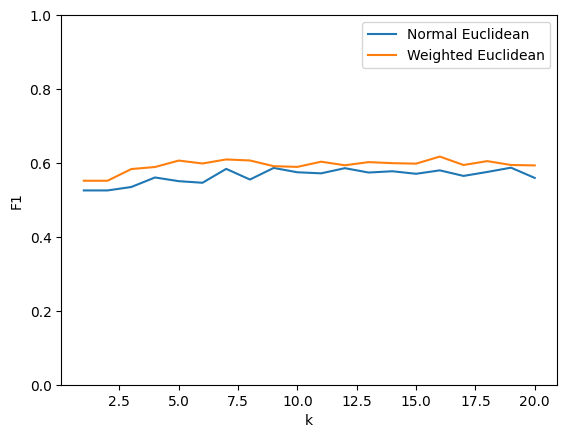

In [36]:

maxK = 20
normalF1 = [0]*maxK
weightedF1 = [0]*maxK

for fold in range(1, 6):
  print(f'FOLD {fold}')
  train = pd.read_csv(f'/content/drive/MyDrive/TJ/ML/ML1 Q2 Project/Data/k-fold/train{fold}.csv')
  test = pd.read_csv(f'/content/drive/MyDrive/TJ/ML/ML1 Q2 Project/Data/k-fold/test{fold}.csv')
  caches = {"Normal Euclidean Distance": None, "Weighted Euclidean Distance":None}

  F1 = runExperiment(train, test, maxK, "Normal Euclidean Distance", caches)
  for i in range(maxK): normalF1[i] += F1[i]/5
  F1 = runExperiment(train, test, maxK, "Weighted Euclidean Distance", caches)
  for i in range(maxK): weightedF1[i] += F1[i]/5


plt.figure()
plt.plot(range(1, maxK+1), normalF1, label="Normal Euclidean")
plt.plot(range(1, maxK+1), weightedF1, label="Weighted Euclidean")
plt.xlabel("k")
plt.ylabel("F1")
plt.legend()
plt.ylim(0, 1)
plt.show()